In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_motorbike_amb_calls = pd.read_csv('motorbike_ambulance_calls.csv')

df_motorbike_amb_calls.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
df_motorbike_amb_calls["cnt"].max()

977

In [ ]:
df_motorbike_amb_calls.loc[df_motorbike_amb_calls['cnt'].idxmax()].to_frame().T

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
14773,14774,2012-09-12 00:00:00,autumn,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,977


In [11]:
df_motorbike_amb_calls["cnt"].to_frame().describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17379.0,189.463088,181.387599,1.0,40.0,142.0,281.0,977.0


In [13]:
quantiles = [0.01, 0.025, 0.05, 0.10, 0.15, 0.20, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.975, 0.99, 1]

for i in quantiles:
    print(f"{i * 100}% quantile of cnt is: ", round(df_motorbike_amb_calls["cnt"].quantile(i), 2))

1.0% quantile of cnt is:  2.0
2.5% quantile of cnt is:  3.0
5.0% quantile of cnt is:  5.0
10.0% quantile of cnt is:  9.0
15.0% quantile of cnt is:  16.0
20.0% quantile of cnt is:  27.0
25.0% quantile of cnt is:  40.0
50.0% quantile of cnt is:  142.0
75.0% quantile of cnt is:  281.0
80.0% quantile of cnt is:  321.0
85.0% quantile of cnt is:  376.0
90.0% quantile of cnt is:  451.2
95.0% quantile of cnt is:  563.1
97.5% quantile of cnt is:  663.55
99.0% quantile of cnt is:  782.22
100% quantile of cnt is:  977.0


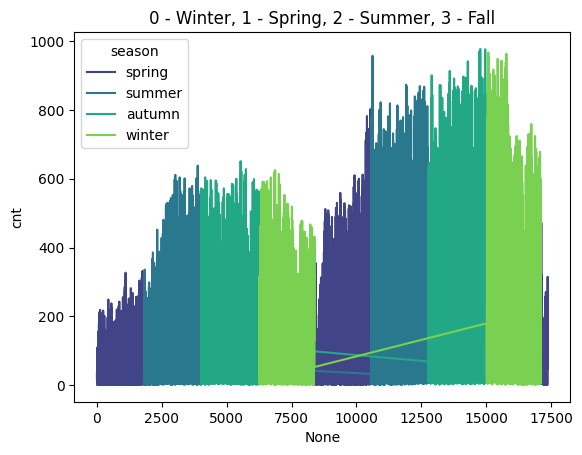

In [14]:
sns.lineplot(data=df_motorbike_amb_calls, x=df_motorbike_amb_calls.index, y="cnt", hue="season", palette="viridis")
plt.title("0 - Winter, 1 - Spring, 2 - Summer, 3 - Fall")
plt.show()


The lineplot shows that in 2012, ambulance calls were much higher, often between 700 and 950, compared to 2011. There was a noticeable spike in calls during the spring of 2012, which could suggest something significant happened at that time. The chart clearly shows this increase in call volume.

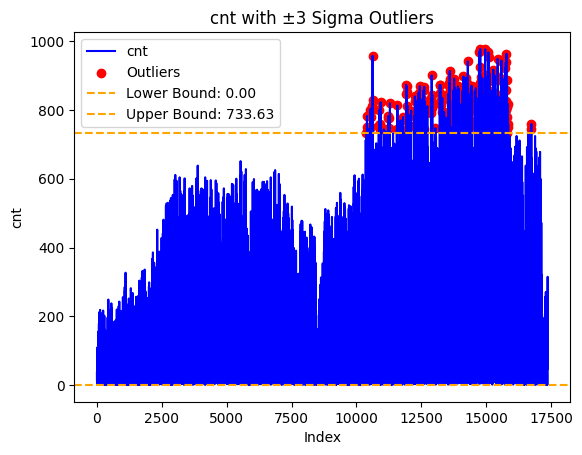

In [15]:
mean_cnt = df_motorbike_amb_calls["cnt"].mean()
std_cnt = df_motorbike_amb_calls["cnt"].std()

lower_bound = max(0, mean_cnt - 3 * std_cnt)
upper_bound = mean_cnt + 3 * std_cnt

outliers = df_motorbike_amb_calls[(df_motorbike_amb_calls["cnt"] < lower_bound) | (df_motorbike_amb_calls["cnt"] > upper_bound)]

plt.plot(df_motorbike_amb_calls.index, df_motorbike_amb_calls["cnt"], label="cnt", color='blue')

plt.scatter(outliers.index, outliers["cnt"], color='red', label='Outliers')

plt.axhline(y=lower_bound, color='orange', linestyle='--', label=f"Lower Bound: {lower_bound:.2f}")
plt.axhline(y=upper_bound, color='orange', linestyle='--', label=f"Upper Bound: {upper_bound:.2f}")

plt.xlabel("Index")
plt.ylabel("cnt")
plt.title("cnt with ±3 Sigma Outliers")
plt.legend()

plt.show()


# **Train**

In [16]:
from sklearn.neighbors import LocalOutlierFactor


In [17]:
X = df_motorbike_amb_calls[['cnt']].values

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_predictions = lof.fit_predict(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_predictions = iso_forest.fit_predict(X)

lof_anomalies = np.where(lof_predictions == -1)[0]

iso_anomalies = np.where(iso_predictions == -1)[0]

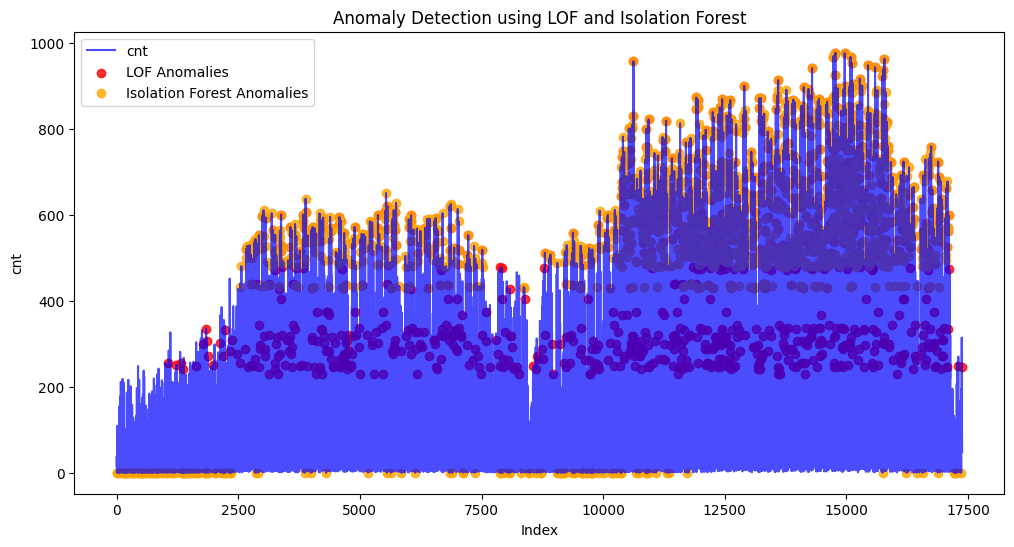

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df_motorbike_amb_calls.index, df_motorbike_amb_calls['cnt'], label='cnt', color='blue', alpha=0.7)

plt.scatter(df_motorbike_amb_calls.index[lof_anomalies], df_motorbike_amb_calls['cnt'].iloc[lof_anomalies], 
            color='red', label='LOF Anomalies', alpha=0.8)

plt.scatter(df_motorbike_amb_calls.index[iso_anomalies], df_motorbike_amb_calls['cnt'].iloc[iso_anomalies], 
            color='orange', label='Isolation Forest Anomalies', alpha=0.8)

plt.title("Anomaly Detection using LOF and Isolation Forest")
plt.xlabel("Index")
plt.ylabel("cnt")
plt.legend()

plt.show()


In [ ]:
anomalies_df = df_motorbike_amb_calls.iloc[iso_anomalies]
anomalies_df.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,2011-01-01,spring,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
30,31,2011-01-02,spring,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,1
49,50,2011-01-03,spring,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,1
71,72,2011-01-04,spring,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,1


In [21]:
anomalies_df.to_csv("anomalies_motorbike.csv", index=False)